<a href="https://colab.research.google.com/github/pmSLUMSHDS/hds5210-2023/blob/main/week12/week12_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

**PSEUDOCODE FOR STEP 1**

loading pandas, reading in the dataset. Per a conversation in Slack, we needed to correct the s3.awsamazon.com to s3.amazonaws.com for this step to work. Then we needed to add on the low_memory=False so Pandas will load the whole file prior to figuring out the data types present in the dataset.

checking the shape (rows & columns) of dataset

checking the first 5 rows (head) of the dataset

Can't see the InspectDate column from the head view, so I clicked on the tiny table to the upper right of the head table to see more of the columns. InspectDate appears to be datetime format.

Went ahead and made sure all rows had InspectDate as datetime format and converted them.

filtered for greater than or equal to 1986 AND less than or equal to 2014 and saved that to variable date_filter.

then passed the dataset through with my newly created filter to only return the proper date range and saved that to variable condemnations.

checked the shape of condemnations again to make sure it was smaller than original shape.

checked the head again, but can't see any changes with this view...same 5 rows

Asserts work, so all must be well :)


In [1]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', low_memory= False)
condemnations.shape



(32586, 40)

In [2]:
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [3]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

date_filter = (condemnations['InspectDate'].dt.year >= 1986) & (condemnations['InspectDate'].dt.year <= 2014)
condemnations = condemnations.loc[date_filter]

condemnations.shape

(30232, 40)

In [4]:
condemnations

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,NaN,NaN,NaN,NaN,NaN,NaN,1.330900e+10,330900220.0,2013,NaN,...,NaN,NaN,NaN,NaN,NaN,"Ulrich, Ross",NaN,NaN,NaN,NaN
32576,NaN,NaN,NaN,NaN,NaN,NaN,1.247600e+10,247600260.0,2029,NaN,...,NaN,NaN,NaN,NaN,NaN,"Ulrich, Ross",NaN,NaN,NaN,NaN
32581,NaN,NaN,NaN,NaN,NaN,NaN,1.382900e+10,382900560.0,5971,NaN,...,NaN,NaN,NaN,NaN,NaN,"Popoolas, Adebanjo",https://www.stlcitypermits.com/violationimages...,NaN,NaN,NaN
32582,NaN,NaN,NaN,NaN,NaN,NaN,1.303400e+10,303400010.0,7154,NaN,...,NaN,NaN,NaN,NaN,NaN,"Wood, Paul",NaN,NaN,NaN,NaN


In [5]:
#condemnations.info()

In [6]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

**PSEUDOCODE FOR STEP 2**

imported numpy

made a new column, called Year_only to pull out the year from the datetime column, InspectDate.

checked the dataset to see my new column Year_only

used pivot_table on condemnations....making the index as Year_only, the columns as the values from Status column, aggregated using size, and filled the NaN values with zeros. Saved it all to variable by_year.

looked at by_year

In [7]:

import numpy as np

condemnations['Year_only']= condemnations['InspectDate'].dt.year
#condemnations['Status'] = condemnations['Status'].astype(str).str.upper......Based on the "suggestion" in the directions, I thought I needed to use aggfunc=np.ma.count, but I could not get that to work, tried double checking that Status column was all string
#condemnations['Status']= condemnations['Status'].replace('NAN', 'Missing').....then figured it couldn't hurt to replace the NANs with Missing....turns out I did not need to do either.....alas....
#by_year = condemnations.pivot_table(index ='Year_only', columns='Status', aggfunc=np.ma.count, fill_value=0)
#by_year = by_year[['B', 'L', 'R', 'W']]
#print(condemnations['Status'].unique)

In [8]:
condemnations

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo,Year_only
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN,1986
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN,2009
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN,2003
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN,1996
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,NaN,NaN,NaN,NaN,NaN,NaN,1.330900e+10,330900220.0,2013,NaN,...,NaN,NaN,NaN,NaN,"Ulrich, Ross",NaN,NaN,NaN,NaN,2013
32576,NaN,NaN,NaN,NaN,NaN,NaN,1.247600e+10,247600260.0,2029,NaN,...,NaN,NaN,NaN,NaN,"Ulrich, Ross",NaN,NaN,NaN,NaN,2013
32581,NaN,NaN,NaN,NaN,NaN,NaN,1.382900e+10,382900560.0,5971,NaN,...,NaN,NaN,NaN,NaN,"Popoolas, Adebanjo",https://www.stlcitypermits.com/violationimages...,NaN,NaN,NaN,2014
32582,NaN,NaN,NaN,NaN,NaN,NaN,1.303400e+10,303400010.0,7154,NaN,...,NaN,NaN,NaN,NaN,"Wood, Paul",NaN,NaN,NaN,NaN,2013


In [9]:
by_year = condemnations.pivot_table(index ='Year_only', columns='Status', aggfunc='size', fill_value=0)


In [10]:
by_year

Status,B,L,R,W
Year_only,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [11]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


**PSEUDOCODE FOR STEP 3**

using only the matplotlib already in pandas, plotted a stacked bar chart, chose a figsize and a title and was about to label the x & y axis until I realized that was a different package.....

<Axes: title={'center': 'Status Counts by Year'}, xlabel='Year_only'>

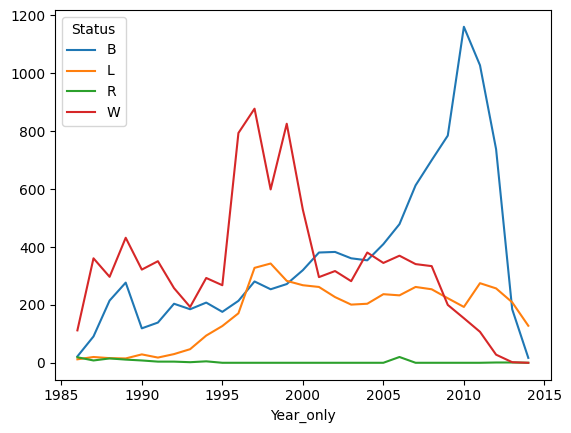

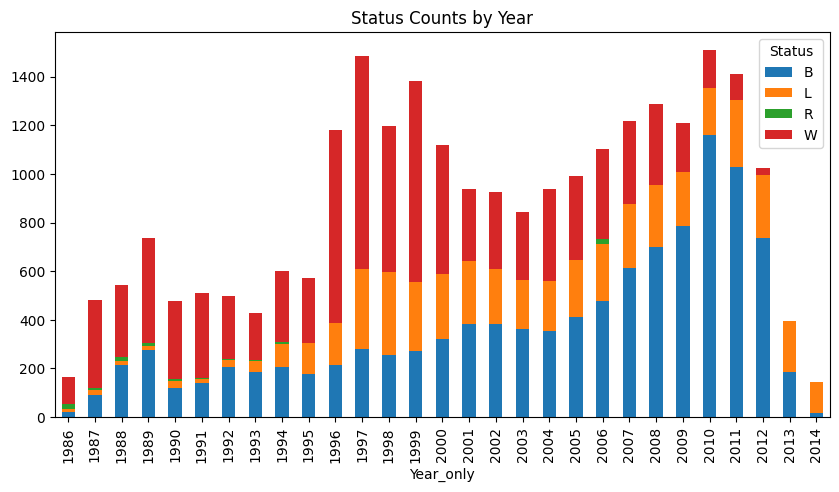

In [12]:
%matplotlib inline
by_year.plot()

by_year.plot(kind = 'bar', stacked=True, figsize=(10,5), title='Status Counts by Year')
#plt.ylabel('Count')....hehehe that is for the actual matplotlib package



 Decided to stack the counts by year for each status. Had to Google what the codes mean. B= boarded up to prevent unauthorzed entry and prevent access to any potential hazards. L= legal action is pending to address the property's condition. W= warrant for demolition issued, so the property is uninhabitable and needs to be removed. R= rehabilitation required, so with some work it could be habitable again, but not in its current state.

 Of all the codes, R (rehabilitation) seems the better status of the four (most hopeful, I suppose...there'a a chance) and is also the least seen color on the graph. A few years have a sliver of green, but many years have none. Legal action pending (L) is next, increasing over the years, holding fairly steady from 1997. For W (warrant for demo) used to be a popular status increasing through 1999 and has been on the decline since, with none in 2013 and 2014. B (boarded up) steadily increased over the years with the most in 2010 then declined dramatically to almost nothing in 2014.

 In the years where there were more warrants for demolition (W), there seemed to always be less homes boraded up (B). As B started increasing, W started decreasing.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


BEGINNING THOUGHTS:

okay....need to write this one out.....

Basically I need to figure out which folks used the service during the 1st time frame and then how many times they used the service during the 2nd time frame and then calculate the different between the two.

so is it in the FEB dates, if true, then we need those counts per user
so is it in the MAR dates, if true, then we need those counts and folks too

make a smaller table with needed info perhaps? Or just leave it all and pivot out the info needed?

Then pivot it all so User is the index, then counts before and counts during and calculated difference are the columns.

Seems so simple..... 😑

will have to see how that fits in with the directions and hints already given.


**PSEUDOCODE FOR PART 2**

imported pandas and loaded the file correcting s3.awsamazon to s3.amazonaws

checked out the first 5 rows to make sure it loaded

followed the hint by pulling the first 10 characters (so just the date part of the datetime column) and making the its own column called startDate

followed the hints again making columns for Before for the Feb time frame and another for During for the Mar timeframe

then used those to say if it was true, then count those and group by user for both timeframes

then got the total useage for people in that timeframes by adding them together

Looked up the pd.concat to make sure I had that right (geeksforgeeks.org). Punctuation is not my friend. So everyone who used the video conference in the 2 timeframes is now together with the total and saved to smaller_meetings....hopefully....

set the columns as userName, Before, During, total_use

calculated the %change by getting the difference between the 2 dates and dividing by the total for that user.

then pivoted the smaller_meetings dataset to have userName as index, and the other counts as the Before and During and then the caluculated pctChange

The table seemed to work....headings are right.

Length assertion worked.

But last one will not work....unsure where I went wrong.


In [37]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

In [38]:
meetings.head()

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,meetingDurationMinutes,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,81.2167,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,31.9333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,110.8667,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,27.7500,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,19.7333,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN


In [39]:
meetings['startDate'] = meetings['startTime'].str[0:10]

#meetings['Before'] = (meetings('startDate') >= '2020-02-17' & meetings('startDate') <= '2020-02-28') ....punctuation, punctuation and punctuation
#meetings['Before'] = (meetings['startDate'] >= '2020-02-17' & meetings['startDate']<= '2020-02-28').....OMG.....trying to just remember without scrolling up to see how I did it last time, it's working soooo well :)


#meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')] = 'Before'
#meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')] = 'During'

meetings['Before'] = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate']<= '2020-02-28')
meetings['During'] = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate']<= '2020-03-27')

#use_FEB = meetings[meetings['Before'] == True].groupby('userName').size('userName')
use_FEB = meetings[meetings['Before'] == True].groupby('userName').size()
use_MAR = meetings[meetings['During'] ==True].groupby('userName').size()
total_use = use_FEB.add(use_MAR)


In [40]:
smaller_meetings = pd.concat([use_FEB, use_MAR, total_use], axis=1).reset_index()     #looked up pd.concat in geekforgeeks.org to make the smaller table
smaller_meetings.columns = ['userName', 'Before', 'During', 'total_use']

smaller_meetings['pctChange'] = (smaller_meetings['During'] - smaller_meetings['Before']) / smaller_meetings['total_use']


In [41]:
summary = smaller_meetings.pivot_table(index='userName', values =['Before', 'During', 'pctChange'])

sum= smaller_meetings['pctChange'].sum()
sum                  # not right....ugh.....

3.6122547018892934

In [42]:
summary.head()

,Before,During,pctChange
userName,,,
Drew.Marco,12,19.0,0.225806
amit.bhagat,17,30.0,0.276596
andrea.bryant.amitechsolutions,5,3.0,-0.250000
angie.warren,5,9.0,0.285714
chris.rogers.amitechsolutions,4,3.0,-0.142857


---

In [43]:
assert(len(summary) == 22)

In [44]:
assert(summary['pctChange'].mean().round(2) == 0.92)

AssertionError: ignored



---



## Submitting Your Work

Submit as usual
